# Final Project: Basins of Attraction
**Course:** Numerical Algorithms

**Student:** Samer Haddadin

**Neptun:** JUTYYM

## Objective
The goal of this project is to explore and visualize the **Basins of Attraction** for Newton's Method. For this I implement a vectorized solver to efficiently map initial guesses $x_0$ (or $z_0$) to their converged roots.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib for high-quality inline figures
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [3]:
def newton_method_vectorized(f, df, z0, tol=1e-6, max_iter=50):
    """
    Vectorized Newton's method solver.
    Works for both real (1D) and complex (2D) arrays.
    Returns the final position and the number of iterations taken.
    """
    z = z0.copy()
    # Track iterations to measure convergence speed
    iters = np.zeros_like(z0, dtype=int)
    
    for i in range(max_iter):
        derivative = df(z)
        # Prevent division by zero errors on flat spots
        derivative[derivative == 0] = 1e-16
        
        step = f(z) / derivative
        z = z - step
        
        # Track active points (that moved significantly)
        # Used to measure 'speed of convergence'
        active = np.abs(step) > tol
        iters[active] += 1
        
    return z, iters

def get_root_indices(final_z, roots, tol=1e-3):
    """Classify final points by which root they converged to."""
    indices = np.full(final_z.shape, -1, dtype=int)
    for i, r in enumerate(roots):
        indices[np.abs(final_z - r) < tol] = i
    return indices

## Part 1: Real Polynomials
Analyze the basins for the three required functions, plus one custom interesting function:
1. $f(x) = (x-4)(x+1)$
2. $g(x) = (x-1)(x+3)$
3. $h(x) = (x-4)(x-1)(x+3)$
4. **Custom:** $k(x) = x^4 - 5x^2 + 4$ (4 roots at $\pm 1, \pm 2$)

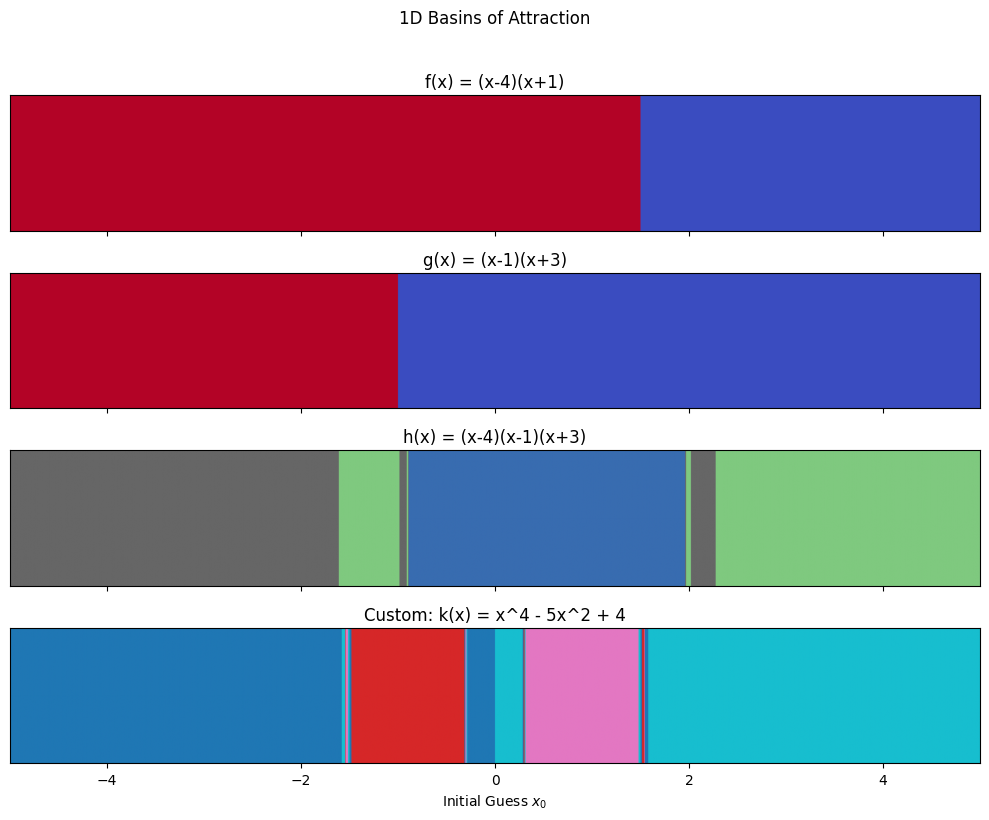

In [4]:
# 1. Define Functions
def f1(x): return (x - 4)*(x + 1)
def df1(x): return 2*x - 3
r1 = [4, -1]

def f2(x): return (x - 1)*(x + 3)
def df2(x): return 2*x + 2
r2 = [1, -3]

def f3(x): return (x - 4)*(x - 1)*(x + 3)
def df3(x): return 3*x**2 - 2*x - 11
r3 = [4, 1, -3]

# Custom Function: Quartic Double-Well potential
# Interesting because it has symmetric roots and nested basins
def f4(x): return x**4 - 5*x**2 + 4
def df4(x): return 4*x**3 - 10*x
r4 = [-2, -1, 1, 2]

# 2. Setup Domain
x_dom = np.linspace(-5, 5, 2000)

# 3. Solve & Classify (Ignore iterations for 1D)
res1, _ = newton_method_vectorized(f1, df1, x_dom)
c1 = get_root_indices(res1, r1)

res2, _ = newton_method_vectorized(f2, df2, x_dom)
c2 = get_root_indices(res2, r2)

res3, _ = newton_method_vectorized(f3, df3, x_dom)
c3 = get_root_indices(res3, r3)

res4, _ = newton_method_vectorized(f4, df4, x_dom)
c4 = get_root_indices(res4, r4)

# 4. Plot
fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
fig.suptitle("1D Basins of Attraction", y=1.02)

ax[0].imshow(c1.reshape(1, -1), extent=[-5,5,0,1], aspect='auto', cmap='coolwarm')
ax[0].set_title("f(x) = (x-4)(x+1)")
ax[0].set_yticks([])

ax[1].imshow(c2.reshape(1, -1), extent=[-5,5,0,1], aspect='auto', cmap='coolwarm')
ax[1].set_title("g(x) = (x-1)(x+3)")
ax[1].set_yticks([])

ax[2].imshow(c3.reshape(1, -1), extent=[-5,5,0,1], aspect='auto', cmap='Accent')
ax[2].set_title("h(x) = (x-4)(x-1)(x+3)")
ax[2].set_yticks([])

ax[3].imshow(c4.reshape(1, -1), extent=[-5,5,0,1], aspect='auto', cmap='tab10')
ax[3].set_title("Custom: k(x) = x^4 - 5x^2 + 4")
ax[3].set_yticks([])
ax[3].set_xlabel("Initial Guess $x_0$")

plt.tight_layout()
plt.show()

## Part 2: Complex Basins & Advanced Features
Examining $f(z) = z^3 - 1$ in the complex plane.

Advanced features:
1.  **Physics Measurement (Convergence Speed):** measuring and visualizing how many iterations it takes for each point to converge. Points near fractal boundaries take longer (higher "energy" cost).
2.  **Boundary Zoom:** selecting a small, chaotic region on the boundary and re-simulate it at very high resolution to reveal self-similar fractal structures.

In [5]:
# Setup 2D Grid
res = 1000
x = np.linspace(-2, 2, res)
y = np.linspace(-2, 2, res)
X, Y = np.meshgrid(x, y)
Z_grid = X + 1j*Y

# Define Roots of Unity
roots_complex = [1, -0.5 + 0.866025j, -0.5 - 0.866025j]

print("Grid shape:", Z_grid.shape)

Grid shape: (1000, 1000)


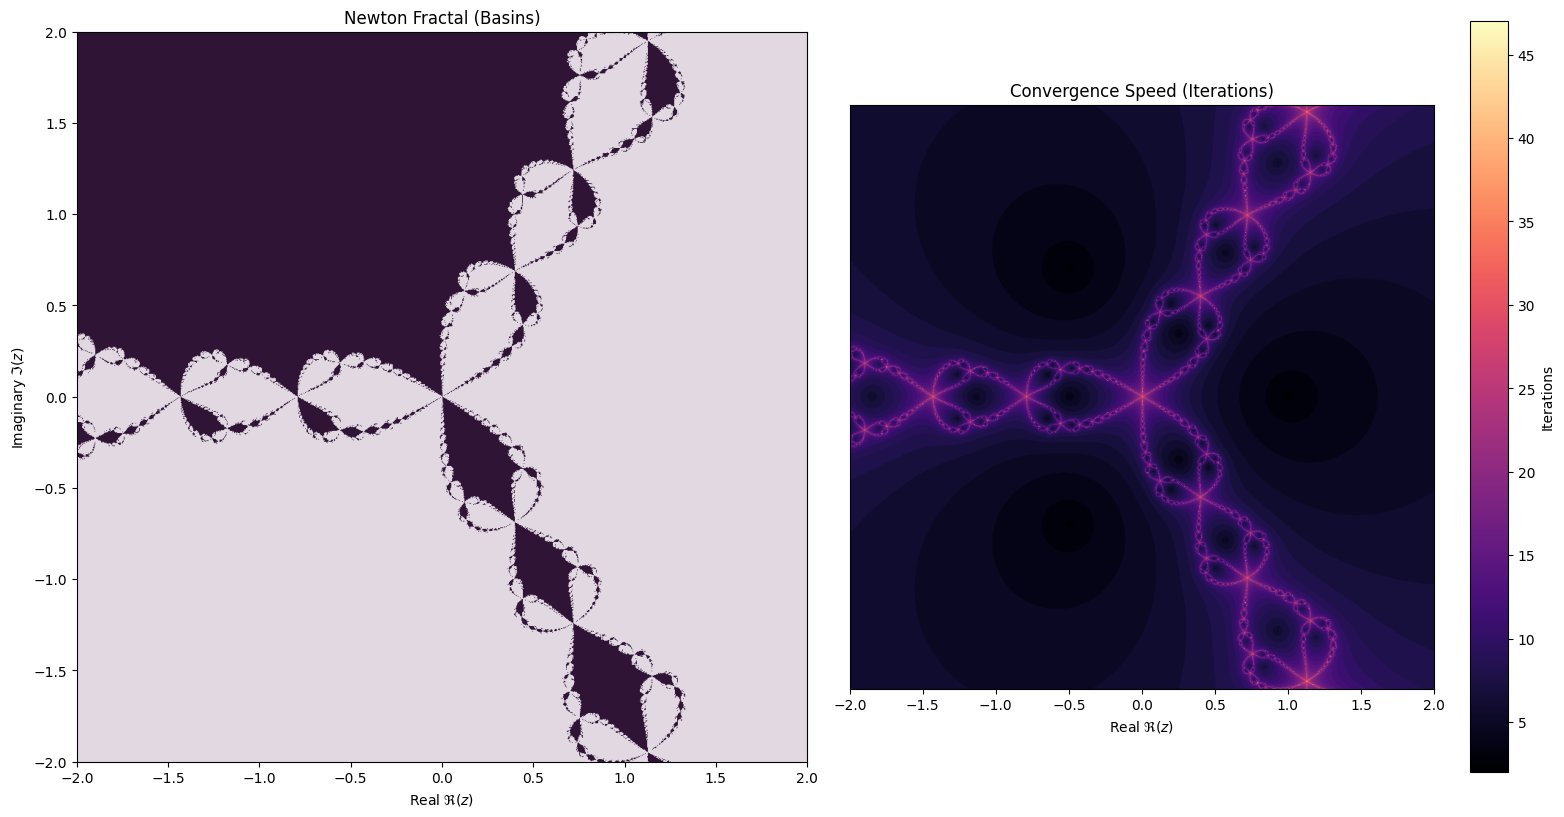

In [6]:
# 1. Solve
# Capture 'iters' here for the physics plot
Z_final, iters = newton_method_vectorized(lambda z: z**3 - 1, lambda z: 3*z**2, Z_grid)
fractal_map = get_root_indices(Z_final, roots_complex)

# 2. Visualization
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot A: The Basins
ax[0].imshow(fractal_map, extent=[-2, 2, -2, 2], origin='lower', cmap='twilight')
ax[0].set_title("Newton Fractal (Basins)")
ax[0].set_xlabel(r"Real $\Re(z)$")
ax[0].set_ylabel(r"Imaginary $\Im(z)$")

# Plot B: Convergence Speed
# Dark colors = fast convergence, Bright colors = slow (chaotic boundaries)
im = ax[1].imshow(iters, extent=[-2, 2, -2, 2], origin='lower', cmap='magma')
ax[1].set_title("Convergence Speed (Iterations)")
ax[1].set_xlabel(r"Real $\Re(z)$")
ax[1].set_yticks([])
plt.colorbar(im, ax=ax[1], label="Iterations")

plt.tight_layout()
plt.show()

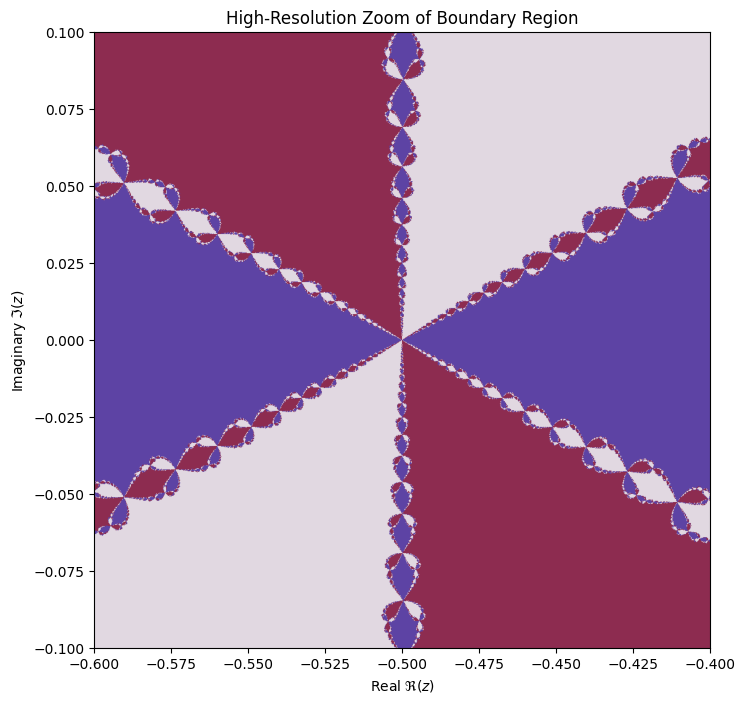

In [7]:
# ADVANCED FEATURE: BOUNDARY ZOOM
# I Zoomed into the origin (0,0), which is a "saddle point" for z^3-1.
# All three basins of attraction meet here, creating infinite complexity.

# 1. Define Zoom Region
zoom_res = 1000
xz = np.linspace(-0.2, 0.2, zoom_res)
yz = np.linspace(-0.2, 0.2, zoom_res)
Xz, Yz = np.meshgrid(xz, yz)
Z_zoom = Xz + 1j*Yz

# 2. Solve High-Res Zoom area
Z_zoom_final, _ = newton_method_vectorized(lambda z: z**3 - 1, lambda z: 3*z**2, Z_zoom)
zoom_map = get_root_indices(Z_zoom_final, roots_complex)

# 3. Plot Zoom
plt.figure(figsize=(8, 8))
plt.imshow(zoom_map, extent=[-0.6, -0.4, -0.1, 0.1], origin='lower', cmap='twilight')
plt.title("High-Resolution Zoom of Boundary Region")
plt.xlabel(r"Real $\Re(z)$")
plt.ylabel(r"Imaginary $\Im(z)$")

plt.show()